# California Property Price Prediction
This project uses regression techniques to predict median house values in California districts based on features such as income, rooms, population, and location.

**# Step 1: Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**# Step 2: Load Dataset**

In [54]:
df = pd.read_csv(" data_file.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


**# Step 3: EDA**

In [3]:
# Shape and data types
df.shape  # Rows and columns
df.info() # Data types and non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
# Basic statistics of numerical columns
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Count of missing values in each column
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Visualizing Distributions

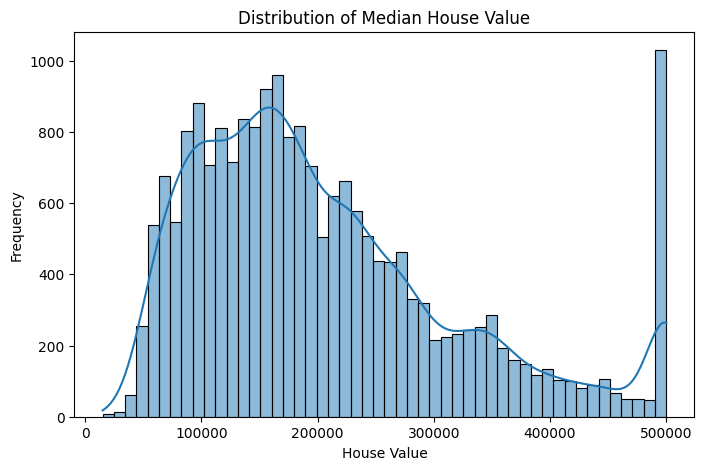

In [6]:
# Distribution of median house value
plt.figure(figsize=(8, 5))
sns.histplot(df["median_house_value"], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.show()


Correlation Heatmap

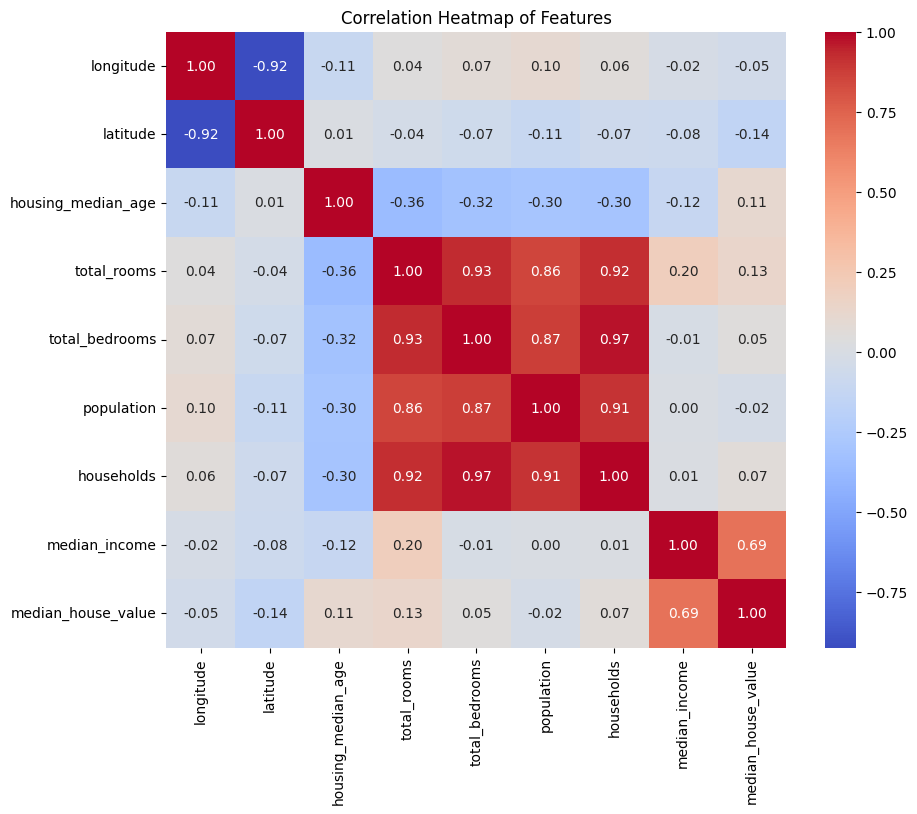

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.title("Correlation Heatmap of Features")
plt.show()


Categorical Variable (ocean_proximity)

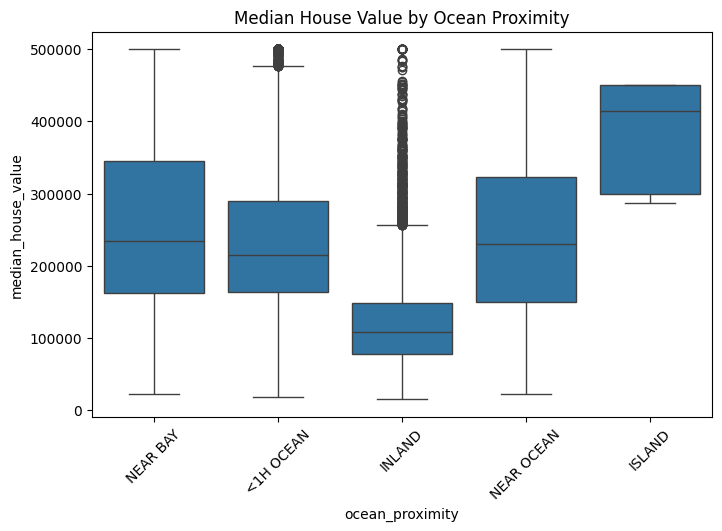

In [8]:
# Value counts
df["ocean_proximity"].value_counts()

# Barplot of median value by proximity
plt.figure(figsize=(8, 5))
sns.boxplot(x="ocean_proximity", y="median_house_value", data=df)
plt.xticks(rotation=45)
plt.title("Median House Value by Ocean Proximity")
plt.show()


In [9]:
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**# Step 4: Data Preprocessing**

In [56]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [57]:
df.duplicated().sum()


np.int64(0)

**# Step 5: Feature and Target Split**

In [12]:
X = df.drop("median_house_value", axis=1)  # Features
y = df["median_house_value"]               # Target


**# Step 6: Train-Test Split**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


**# Step 7: Simple Linear Regression with 'median_income'**

In [45]:
from sklearn.linear_model import LinearRegression

# Use only 'median_income' for simple regression
X_simple = X_train[["median_income"]]
X_simple_test = X_test[["median_income"]]

# Initialize and train the model
simple_model = LinearRegression()
simple_model.fit(X_simple, y_train)

# ✅ Predict values for the test set
y_pred_simple = simple_model.predict(X_simple_test)


In [33]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**# Step 8: Multiple Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred_multi = multi_model.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Multiple Linear Regression:")
print(f"RMSE: {rmse_multi:.2f}")
print(f"R² Score: {r2_multi:.4f}")


Multiple Linear Regression:
RMSE: 70060.52
R² Score: 0.6254


In [59]:
# Coefficients of the Multiple Linear Regression model
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": multi_model.coef_
})
coef_df.sort_values(by="Coefficient", key=abs, ascending=False)


,Feature,Coefficient
9,ocean_proximity_ISLAND,136125.072615
8,ocean_proximity_INLAND,-39786.656161
7,median_income,39473.975175
0,longitude,-26838.273372
1,latitude,-25468.352050
10,ocean_proximity_NEAR BAY,-5136.642217
11,ocean_proximity_NEAR OCEAN,3431.140073
2,housing_median_age,1102.185084
4,total_bedrooms,102.789395
6,households,48.252753


**# Step 9: Evaluation Summary**

In [40]:

results = pd.DataFrame({
    "Model": ["Simple Linear Regression", "Multiple Linear Regression"],
    "RMSE": [rmse_simple, rmse_multi],
    "R² Score": [r2_simple, r2_multi]
})

results.style.set_caption("Model Performance Comparison").format({
    "RMSE": "{:.2f}",
    "R² Score": "{:.4f}"
})


,Model,RMSE,R² Score
0,Simple Linear Regression,84209.01,0.4589
1,Multiple Linear Regression,70060.52,0.6254


**# Step 10: Visualizations**

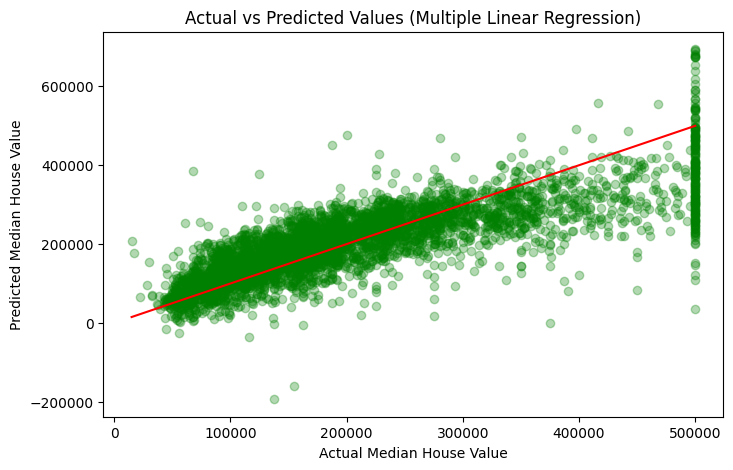

In [36]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_multi, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Values (Multiple Linear Regression)")
plt.show()


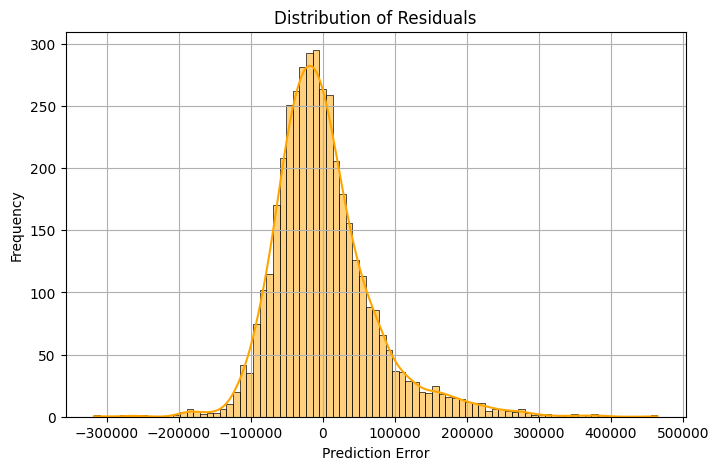

In [41]:
residuals = y_test - y_pred_multi
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Final Model Export**

In [46]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [48]:
import joblib

# Save the multiple linear regression model
joblib.dump(multi_model, 'final_property_price_model.pkl')

print("✅ Final model saved as 'final_property_price_model.pkl'")


✅ Final model saved as 'final_property_price_model.pkl'


In [49]:
# Load the saved model
loaded_model = joblib.load('final_property_price_model.pkl')

# Predict using loaded model
loaded_predictions = loaded_model.predict(X_test)

# Confirm it works
print(f"Loaded model RMSE: {np.sqrt(mean_squared_error(y_test, loaded_predictions)):.2f}")


Loaded model RMSE: 70060.52


## 🎯 Conclusion

This project aimed to predict the median house value in various California districts using both **Simple Linear Regression** and **Multiple Linear Regression**.

### ✅ Key Observations:
- **Simple Linear Regression** (using only `median_income`) yielded:
  - RMSE: ~84,000
  - R² Score: ~0.46
- **Multiple Linear Regression** (using all features) improved the performance:
  - RMSE: ~70,000
  - R² Score: ~0.63

### 🏁 Final Model Selection:
- Based on the lower RMSE and higher R² score, the **Multiple Linear Regression** model is selected as the final model.
- It balances **accuracy** with **interpretability**, and is more suitable for predicting housing prices in real-world scenarios.

### 📦 Evaluation Metrics Used:
- **RMSE** (Root Mean Squared Error): Measures the average magnitude of errors.
- **R² Score** (Coefficient of Determination): Represents the proportion of variance explained by the model.

> ⚠️ Note: Metrics like **precision**, **recall**, and **confusion matrix** are not applicable here, as this is a **regression** task — not a classification problem.

### 💾 Model Export:
- The final model has been saved as `final_property_price_model.pkl` for future use.





🎉 **Project Complete!**
